## Step 0: importing libraries and functions


In [16]:
import pandas as pd
from os import path
from config import CSV_FOLDER
from data_parser import parse_main
from data_processor import get_tech_count


## Step 1: getting csv file parsed from djinni
    - by default parse_main parses job vacancies from djinni.co for "python"
    - base url as well as language preset can be viewd and adjusted in config file
    - csv_file_name variable to store filename, for example it can be date of data parsing for archiving
    - after parsing is complete .csv file can found in folder "parsed_results"
    - folder name can be adjusted by changing value of CSV_FOLDER in config file
    - if the file with same name already exists it will not be parsed again, this should prevent unnecessary website requests in case of restarting scripts on jupyter file
    - if some old file needs to be processed and analysed just provide its name to the variable

In [17]:
%run data_parser.py
%autoawait asyncio

csv_file_name = "python_21_05.csv"

if not path.exists(path.join(CSV_FOLDER, csv_file_name)):
    await parse_main(csv_file_name)


## Step 2: making dataframe from stored csv

    - pandas dataframe is building according to csv structure
    - csv structure of file depends on dataclass and logic from data_parser file
    - folder where csv files are stored depends on CSV_FOLDER variable from config
    - after getting dataframe it can be filtered by date or by years_limit in demand
    - change years_limit variable (numeric value) to set year filter for vacancies
    


In [18]:
years_limit = None

df = pd.read_csv(path.join(CSV_FOLDER, csv_file_name))
df["posted"] = df["posted"].astype("datetime64[ns]")

if years_limit is not None:
    df = df[df["experience"] <= years_limit]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        303 non-null    object        
 1   posted       303 non-null    datetime64[ns]
 2   experience   303 non-null    int64         
 3   views        303 non-null    int64         
 4   replies      303 non-null    int64         
 5   description  303 non-null    object        
 6   link         303 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 16.7+ KB


## Step 3: get most common tech names with count from dataframe

    - we are getting count of techs in demand by combining descriptions from dataframe and getting most used keywords
    - to configure what words shouldn't be in this list we can edit files in custom_stopwords folder
    - since most of the jobs on djinni posted in english or ukrainian languages by default added EN and UA files
    - new stop words can be added both by editing existing files or by adding new custom file
    - in case when added new stopwords file its name sould be added to list in config file
    - by editing STOP_WORDS_FILES list in config we can set which files will be read during select stopwords to use


In [19]:
%run data_processor.py
top_n = 15

text_combined = " ".join(df["description"])
techs = get_tech_count(text_combined, top_n)
techs


[('aws', 141),
 ('django', 122),
 ('sql', 117),
 ('backend', 108),
 ('rest', 91),
 ('docker', 91),
 ('ai', 84),
 ('postgresql', 76),
 ('react', 72),
 ('linux', 66),
 ('git', 60),
 ('agile', 60),
 ('frontend', 58),
 ('automation', 58),
 ('kubernetes', 57)]

## Step 4: building bar with statistics from tech count results

    - plots are build according to year limit we set before so its value will be present in title
    - also we can adjust names for both columns we get from parsing techs


<Axes: title={'center': 'Top 15 definitions for python developer job with experience filter set to None'}, xlabel='Technology'>

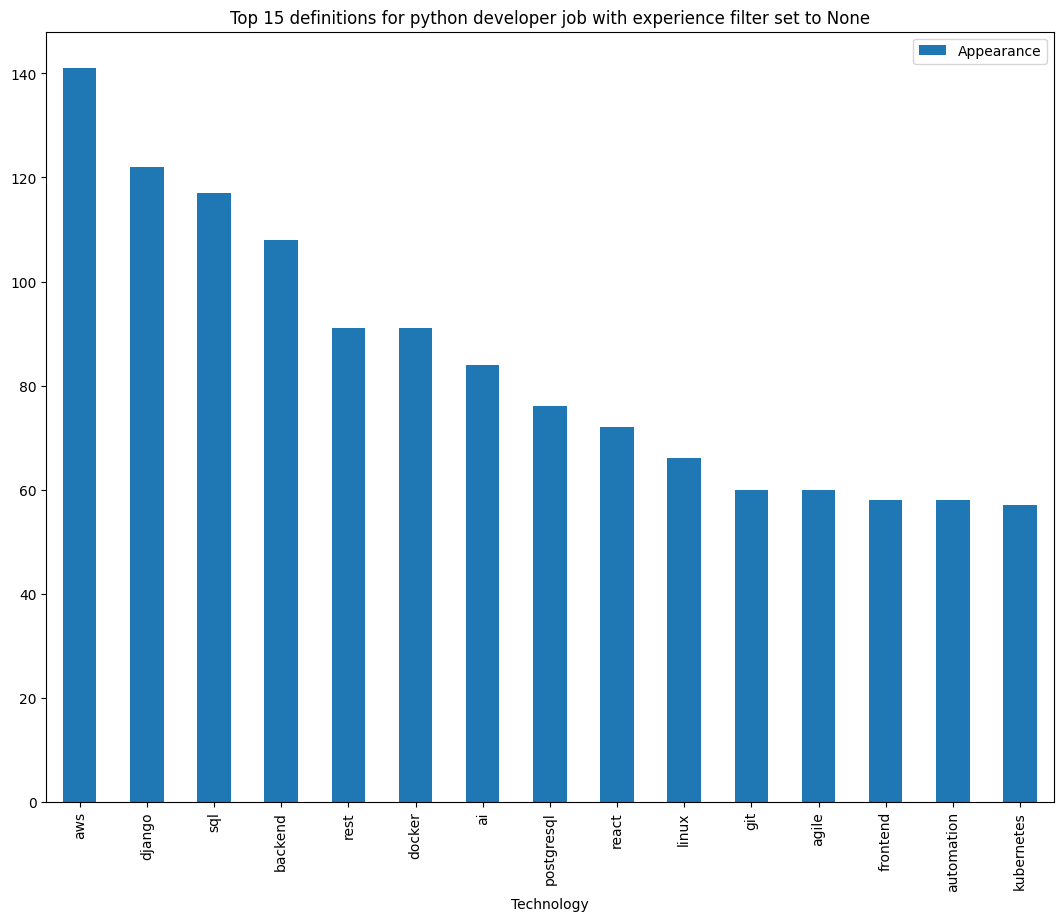

In [20]:
x_column = "Technology"
y_column = "Appearance"

tech_df = pd.DataFrame(techs, columns=[x_column, y_column])
tech_df.plot.bar(
    x=x_column,
    y=y_column,
    figsize=(13, 10),
    title=(
        f"Top {top_n} definitions for python developer job "
        f"with experience filter set to {years_limit}"
    )
)
